##               Experimental Analysis Of Optimization Algorithms in Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

### Function to Optimize:

The function that is to be used in this demonstration is :<br/>
f(x,y)=$ 100 \cdot x \cdot \exp(-0.5 \cdot x^2 + 0.5 \cdot x - 0.5 \cdot y^2 - y + \pi) $ <br/>

This is a simple bi-variate function of variables x and y. In real life ML problems we would be optimzating over several thousand parameters/variables. Although the above function serves the purpose of this experiment.

The derivative of this function with respect to x and y are as follows:

dx= $ 100 \cdot \exp(-0.5 \cdot x^2+0.5 \cdot x - 0.5 \cdot y^2 -y + \pi) \cdot (1 + x \cdot (-x + 0.5)) $

dy= $ 100 \cdot x \cdot \exp(-0.5 \cdot x^2 + 0.5 \cdot x - 0.5 \cdot y^2 - y + \pi) \cdot (-y-1) $


In [2]:
def func(x,y):
    return 100*x*np.exp((-0.5*x**2)+(0.5*x)-(0.5*y**2)-y+np.pi)

def func_dx(x,y):
    return (100*np.exp((-0.5*x**2)+(0.5*x)-(0.5*y**2)-y+np.pi)*(1+x*(-x+0.5)))
    
def func_dy(x,y):
    return (100*x*np.exp((-0.5*x**2)+(0.5*x)-(0.5*y**2)-y+np.pi)*(-y-1))

### Contour Plot:

The following function creates the contour plot of our optimization function. From the contour plot we can see that our function has maximum value of around 4400, and minimum value of around -1600 to which we will try to optimize our parameters.

The function also has a local minima at 0 as seen in the right side of the plot.

In [3]:
def contour_plt(xrange,yrange):
    
    X,Y=np.meshgrid(xrange,yrange)
    
    Z = func(X,Y)
    
    plt.figure(figsize=(10,10))
    CS = plt.contour(X,Y,Z, 15, linewidths=0.5, colors='k')
    CS = plt.contourf(X,Y,Z, 15,
                      vmax=abs(Z).max(), vmin=-abs(Z).max())
    plt.colorbar()  # draw colorbar
    # plot data points.
    plt.scatter(X,Y, marker='o', s=5, zorder=10)
    plt.xlim(-2, 4)
    plt.ylim(-3, 2)
    plt.show()

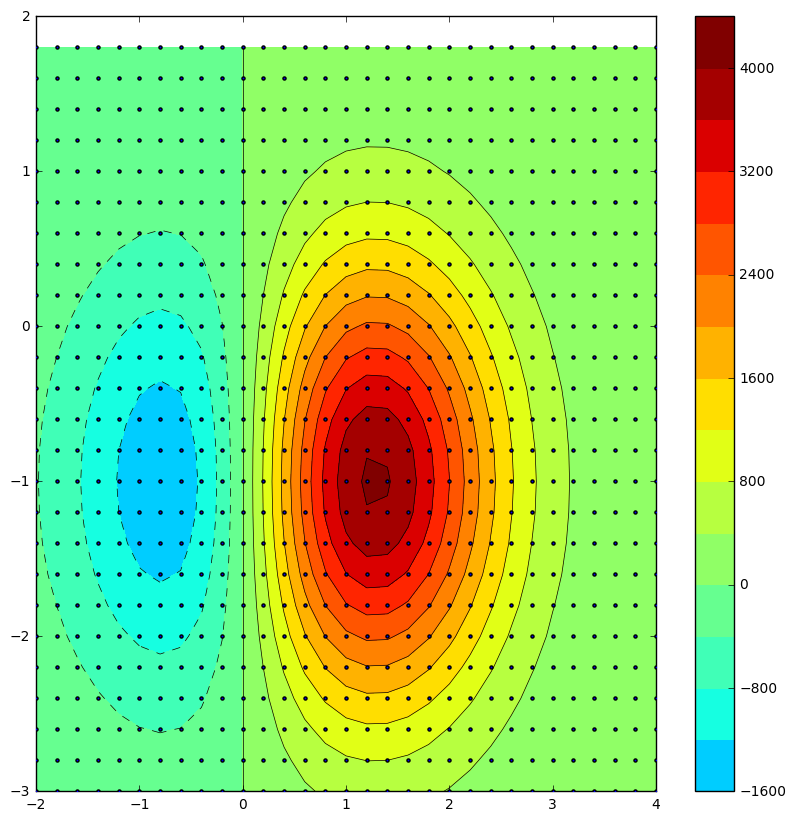

In [4]:
xrange=np.arange(-2,5,0.2)
yrange=np.arange(-3,2,0.2)
contour_plt(xrange,yrange)

### Optimization Algorithms:

The following set of functions implement some commonly used optimization algorithms. There are sufficiently elaborate litrature online to get a hang on all of these algorithms, so I do not intend to provide the details here.

We use these functions to then optimize our f(x,y) and see how these algorithms perform.

#### Stochastic Gradient Descent:

In [5]:
def SGD(init_x,init_y,iterations,lr=0.0001):
    x=init_x  # initialize x
    y=init_y  # initialize y
    cost=[]   # list to store cost values
    x_path=[] # list to store x values
    y_path=[] # list to store y values
    for i in range(iterations):
        cost.append(func(x,y)) # appending the current cost value
        x_path.append(x) # appending current x value
        y_path.append(y) # appending current y value
        dx=func_dx(x,y)  # calculating dx using the predefined function func_dx
        dy=func_dy(x,y)  # calculating dy using the predefined function func_dy
        x=x-lr*dx        # updating x value using the derivative and learning rate  
        y=y-lr*dy        # updating y value using the derivative and learning rate
    
    # Dictionary of values to be returned
    SGD_Dict={'cost':cost,
              'x_path':x_path,
             'y_path':y_path}
    return SGD_Dict

####  Momentum:

In [6]:
def Momentum(init_x,init_y,iterations,beta=0.9,lr=0.0001):
    x=init_x       # initialize x
    y=init_y       # initialize y
    cost=[]        # list to store cost values
    x_path=[]      # list to store x values
    y_path=[]      # list to store y values
    V_dx=V_dy=0    # initialize the velocity values
    for i in range(iterations):
        cost.append(func(x,y)) # appending the current cost value
        x_path.append(x)       # appending current x value
        y_path.append(y)       # appending current y value
        V_dx=beta*V_dx+(1-beta)*func_dx(x,y) # update the velocity values of the x using its current derivative
        V_dy=beta*V_dy+(1-beta)*func_dy(x,y) # update the velocity values of the y using its current derivative
        x=x-lr*V_dx  # updating x value using the velocity and learning rate
        y=y-lr*V_dy  # updating y value using the velocity and learning rate
    
    # Dictionary of values to be returned
    Momentum_Dict={'cost':cost,
              'x_path':x_path,
             'y_path':y_path}
    return Momentum_Dict

#### RMSProp:

In [7]:
def RMSProp(init_x,init_y,iterations,beta=0.9,lr=0.0001,adaptive=False,epsilon=1e-9):
    x=init_x      # initialize x
    y=init_y      # initialize y
    cost=[]       # list to store cost values
    x_path=[]     # list to store x values
    y_path=[]     # list to store y values
    S_dx=S_dy=0   # initialize the squared velocity values
    for i in range(iterations):
        cost.append(func(x,y))    # appending the current cost value
        if(adaptive):             # condition to check if adative learning rate is required
            lr=lr*(1/(1+i*0.5))   # adjusting the learning rate based on the iteration
        x_path.append(x)          # appending current x value
        y_path.append(y)          # appending current y value
        dx=func_dx(x,y)           # calculating dx using the predefined function func_dx
        dy=func_dy(x,y)           # calculating dy using the predefined function func_dx    
        S_dx=beta*S_dx+(1-beta)*(dx**2)  # update the squared velocity values of the x using its current derivative
        S_dy=beta*S_dy+(1-beta)*(dy**2)  # update the squared velocity values of the y using its current derivative
        x=x-lr*dx/(np.sqrt(S_dx)+epsilon)  # updating x value using the squared velocity and learning rate. Epsilon is to avoid divide by 0
        y=y-lr*dy/(np.sqrt(S_dy)+epsilon)  # updating y value using the squared velocity and learning rate. Epsilon is to avoid divide by 0
    
    
    # Dictionary of values to be returned
    RMSProp_Dict={'cost':cost,
              'x_path':x_path,
             'y_path':y_path}
    return RMSProp_Dict

#### Adam:

In [8]:
def Adam(init_x,init_y,iterations,beta=0.9,beta2=0.99,lr=0.0001,epsilon=1e-9): # Momentum + RMSProp
    x=init_x
    y=init_y
    cost=[]
    x_path=[]
    y_path=[]
    V_dx=V_dy=S_dx=S_dy=0
    for i in range(iterations):
        cost.append(func(x,y))
        x_path.append(x)
        y_path.append(y)
        dx=func_dx(x,y)
        dy=func_dy(x,y) 
        V_dx=beta*V_dx+(1-beta)*dx
        V_dy=beta*V_dy+(1-beta)*dy
        S_dx=beta2*S_dx+(1-beta2)*dx**2
        S_dy=beta2*S_dy+(1-beta2)*dy**2
        
        V_dx_corrected=V_dx/(1-(beta**(i+1)))
        V_dy_corrected=V_dy/(1-(beta**(i+1)))
        
        S_dx_corrected=S_dx/(1-(beta2**(i+1)))
        S_dy_corrected=S_dy/(1-(beta2**(i+1)))
        
        x=x-lr*V_dx_corrected/(np.sqrt(S_dx_corrected)+epsilon)
        y=y-lr*V_dy_corrected/(np.sqrt(S_dy_corrected)+epsilon)

    Adam_Dict={'cost':cost,
              'x_path':x_path,
             'y_path':y_path}
    return Adam_Dict

### Experiment 1:

Starting at point (0,5), we use the above algorithms to optimize f(x,y). As we saw in the contour plot, the best optimizer should get us close to the global optimal solution of -1600.

We run these algorithms for 1K iterations and at learning rate of 0.01. <br/>
For Momentum and RMSProp, we set $ beta=0.9.<br/>
For Adam we set beta1=0.9 and beta2=0.99.


In [9]:
SGD_Results=SGD(0,5,1000,0.01)
Momentum_Results=Momentum(0,5,1000,0.9,0.01)
RMSProp_Results=RMSProp(0,5,1000,0.9,0.01)
Adam_Results=Adam(0,5,1000,0.9,0.99,0.01)

### Iteration Plot 1:

From the iteration plot below we can see that SGD and Momentum are both stuck at the initial value of around 0. Varying the learning rate too had very little impact on their performance. <br/>
Both RMSProp and Adam got us closer to the global optimal solution. They both achieved the lost of -1500.<br/>
We can also observe that Adam converged to the optimal solution faster than RMSProp.

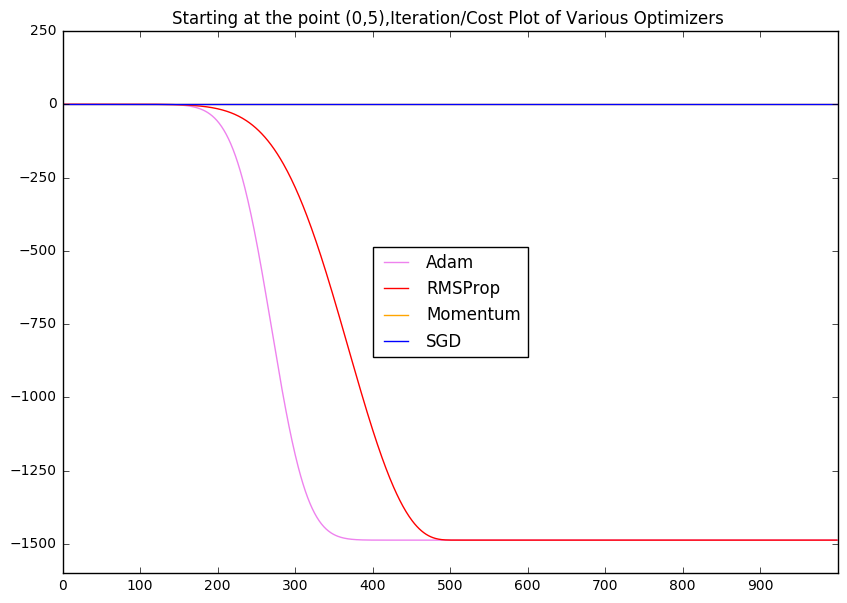

In [10]:
plt.figure(figsize=(10,7))
plt.plot(range(1000),Adam_Results['cost'],c='violet',label="Adam")
plt.plot(range(1000),RMSProp_Results['cost'],c='red',label="RMSProp")
plt.plot(range(1000),Momentum_Results['cost'],c='orange',label="Momentum")
plt.plot(range(1000),SGD_Results['cost'],c='blue',label="SGD")
plt.xticks(np.arange(0,1000,100))
plt.yticks(np.arange(250,-1600,-250))
plt.legend(loc='center')
plt.title("Starting at the point (0,5),Iteration/Cost Plot of Various Optimizers ")
plt.show()

### Experiment 2:

Now in this experiment , we start at the initial point of x=1.5 and y=-1.5. At this point we are close to the peak of f(x,y) at 3500. <br/>
We now setup the algorithms to optimize our function as before.

In [11]:
SGD_Results=SGD(1.5,-1.5,5000,0.00001)
Momentum_Results=Momentum(1.5,-1.5,5000,0.9,0.00001)
RMSProp_Results=RMSProp(1.5,-1.5,5000,0.9,0.001,False)
Adam_Results=Adam(1.5,-1.5,5000,0.9,0.99,0.001)

### Iteration Plot 2:

We can see from the below iteration plot that all of our optimzation algorithms converged to the local minima 0. They did not converge to the global solution by starting at (1,5,-1.5). <br/>
At this point, we can try variants such as adaptive learning rate(refer RMSProp script). But an ideal solution will be <a href="https://en.wikipedia.org/wiki/Simulated_annealing"> Simulated Annealing </a> method of optimization.
<br/>
In our function f(x,y) we only have two dimensions, but often times the real world problems involve optimizing in higher dimensions. In such cases local minima cannot be easily determined and often times they may merely be saddle points. Hence algorithms such as Adam and RMSProp can help us speed up the optimization process.

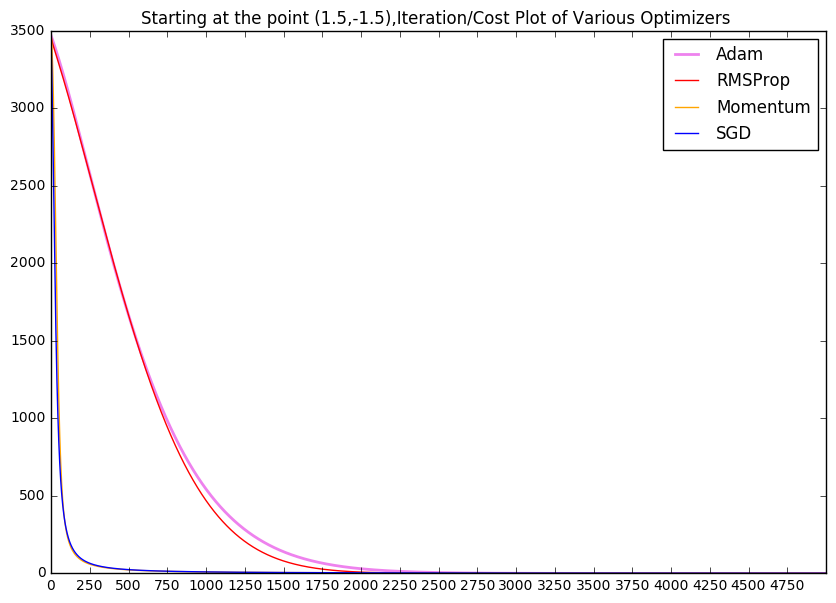

In [12]:
plt.figure(figsize=(10,7))
plt.plot(range(5000),Adam_Results['cost'],c='violet',label="Adam",linewidth=2)
plt.plot(range(5000),RMSProp_Results['cost'],c='red',label="RMSProp")
plt.plot(range(5000),Momentum_Results['cost'],c='orange',label="Momentum")
plt.plot(range(5000),SGD_Results['cost'],c='blue',label="SGD")
plt.xticks(np.arange(0,5000,250))
plt.legend(loc='upper right')
plt.title("Starting at the point (1.5,-1.5),Iteration/Cost Plot of Various Optimizers ")
plt.show()